In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Install SQL Alchemy

In [2]:
!pip install sqlalchemy
!conda install -y -q pymssql

Solving environment: ...working... done

# All requested packages already installed.



### Import packages we need

In [3]:
import sqlalchemy as sa
import pandas as pd
from sqlalchemy import create_engine

### Create a connection to our database

In [4]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Alfred'

### 1 Create connection

In [5]:
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database
)

### 2 What is the sql query we want to perform?

In [6]:
sql_query = "USE Alfred Select * from football_players"

### 3 Using pandas we now take our connection and our query to create a dataframe

In [7]:
df = pd.read_sql_query(sql_query, connection)

In [8]:
df.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,...,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Preferred_Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


# EDA

In [9]:
# Sort by age from oldest to youngest (select first 5 entries)
df.sort_values(by='Age', ascending=False).head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,...,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Preferred_Positions
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,12,13,13,25,32,12,47,17,12,GK
5314,E. El Hadary,44,Egypt,70,28,29,21,41,25,57,...,16,18,15,39,34,19,73,16,12,GK
4839,O. Pérez,44,Mexico,71,60,26,69,69,23,50,...,26,24,11,57,41,12,66,40,13,GK
16834,J. Walker,43,England,55,22,41,53,64,38,35,...,22,22,13,35,19,11,62,32,11,GK
16696,D. Coyne,43,Wales,55,36,36,48,58,31,57,...,28,21,19,33,37,16,76,33,11,GK


In [10]:
# Filter on players older than 30
df[df['Age'] > 40]

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,...,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Preferred_Positions
4839,O. Pérez,44,Mexico,71,60,26,69,69,23,50,...,26,24,11,57,41,12,66,40,13,GK
5314,E. El Hadary,44,Egypt,70,28,29,21,41,25,57,...,16,18,15,39,34,19,73,16,12,GK
6654,Quim,41,Portugal,69,31,37,62,59,28,57,...,27,33,12,36,40,13,68,65,20,GK
7727,K. Wæhler,41,Norway,67,38,80,33,56,45,66,...,48,66,63,31,30,65,73,37,23,CB
16121,C. Day,41,England,57,11,23,20,37,16,40,...,21,12,17,12,25,11,56,23,15,GK
16696,D. Coyne,43,Wales,55,36,36,48,58,31,57,...,28,21,19,33,37,16,76,33,11,GK
16834,J. Walker,43,England,55,22,41,53,64,38,35,...,22,22,13,35,19,11,62,32,11,GK
17977,B. Richardson,47,England,46,25,44,35,44,22,44,...,12,13,13,25,32,12,47,17,12,GK


In [11]:
# Filter on players older than 30 and overall rating greater than 90
df[(df['Age'] > 30) & (df['Overall'] > 90)]

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,...,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Preferred_Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


In [12]:
# Create column of rating per year of age
df['Rating Per Year of Age'] = df['Overall'] / df['Age']

# Look at first 5 entries
df['Rating Per Year of Age'].head()

0    2.937500
1    3.100000
2    3.680000
3    3.066667
4    2.967742
Name: Rating Per Year of Age, dtype: float64

In [13]:
# Drop column just created
df = df.drop('Rating Per Year of Age', axis=1)

df.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,...,Short_passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,Preferred_Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


In [14]:
# Look at the average rating by age (first 5 rows)
df.groupby('Age').mean().head()

,Overall,GK_handling,GK_kicking,GK_positioning
Age,,,,
16,57.846154,15.461538,14.307692,13.000000
17,56.089147,16.701550,16.569767,16.395349
18,57.287202,15.137109,14.790179,39.282738
19,59.430309,14.812734,14.811038,14.547753
20,61.559839,14.708199,14.757844,14.617363


In [15]:

# Look at the average rating by age and nationality (first 5 rows)
df.groupby(['Age', 'Nationality']).mean().head()

Overall  GK_handling  GK_kicking  GK_positioning
Age Nationality                                                  
16  Argentina       56.0          7.5         8.0             7.5
    England         61.5         14.5        10.5             8.0
    France          54.0         11.0        10.0             7.0
    Germany         57.0         61.0        57.0            53.0
    Italy           61.0         12.0        15.0            14.0

In [16]:
# Using def
def year_to_month(x):
    "Converts no of years to no of months"
    return x * 12

In [17]:

# Change the age column to months and look at first 5 entries
df['Age'].apply(year_to_month).head()

0    384
1    360
2    300
3    360
4    372
Name: Age, dtype: int64

In [18]:
# Using lambda operator
year_to_month_lamb = lambda x: x * 12

# Print function answer
print('def: ', year_to_month(30))
print('lambda: ', year_to_month_lamb(30))

def:  360
lambda:  360


In [19]:

# Create function
def position_type(s):
    
    if (s[-2] == 'T') | (s[-2] == 'W'):
        return 'Forward'
    elif s[-2] == 'M':
        return 'Midfielder'
    elif s[-2] == 'B':
        return 'Back'
    else:
        return 'GoalKeeper'

In [20]:
# Create position type column
df['Preferred Positions Type'] = df['Preferred_Positions'].apply(position_type)

# Look at first 5 entries
df['Preferred Positions Type'].head()

0       Forward
1       Forward
2       Forward
3       Forward
4    GoalKeeper
Name: Preferred Positions Type, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 40 columns):
Name                        17981 non-null object
Age                         17981 non-null int64
Nationality                 17981 non-null object
Overall                     17981 non-null int64
Acceleration                17981 non-null object
Aggression                  17981 non-null object
Agility                     17981 non-null object
Balance                     17981 non-null object
Ball_control                17981 non-null object
Composure                   17981 non-null object
Crossing                    17981 non-null object
Curve                       17981 non-null object
Dribbling                   17981 non-null object
Finishing                   17981 non-null object
Free_kick_accuracy          17981 non-null object
GK_diving                   17981 non-null object
GK_handling                 17964 non-null float64
GK_kicking                  17970 non-null

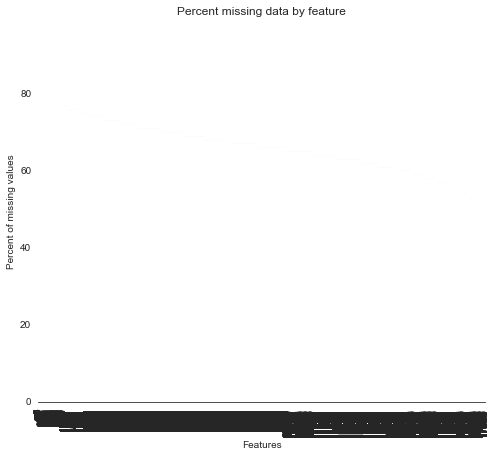

In [23]:

# visualising missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
df['Overall'].plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)